In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("cleaned_ground_truth_rerun_full_PRJ_table_invariant_GTLSA_fixed.csv",index_col=0)
keys=['num_workers','objid','thresh','J [MV]', u'J [GT]', u'J [basic]', u'J [GTLSA]', u'J [isoGT]','J [isoGTLSA]']


The visualization I suggested I think is doable in one plot.
1 histogram for GT tiles:
x-axis = different buckets of value of tile area
y-axis = count of number of tiles with the tile area in any vertical slice
And just one special vertical marker line showing where the median area is.
Similarly another histogram for NGT tiles.
And you could try what you suggested as well.
I'm sure there are other meaningful visualizations that can help us understand this...

One addition to the histogram I suggested above:
You could divide each vertical bar into two zones with 2 different colors: one color / segment for fraction of tiles in that bucket that we predicted correctly, and one color / segment for tiles that we predicted incorrectly.

(Here, if a tile lies partially in the actual ground truth, you can again use the 60% overlap with GT kind of threshold to decide that it is part of the ground truth.)


In [4]:
athres = pd.read_csv("area_thres.txt",header=None)
athres.columns=["batch","objid","algo","area_thresh_gt","area_thresh_ngt"]

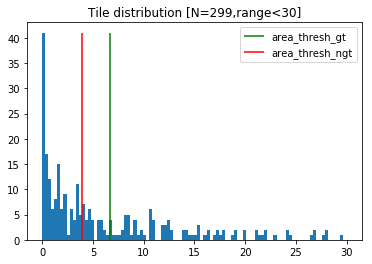

In [5]:
batch="5workers_rand0"
objid = 1

tile_area = pkl.load(open("pixel_em/{}/obj{}/tarea.pkl".format(batch,objid)))
tidx_mask = pkl.load(open("pixel_em/{}/obj{}/tidx_mask.pkl".format(batch,objid)))
val = athres[(athres["batch"]==batch)&(athres["objid"]==objid)]

xmax=30
plt.title("Tile distribution [N={},range<{}]".format(len(tile_area),xmax))
a = plt.hist(tile_area,range=(0,xmax),bins=100)#,bins=100)
plt.vlines(float(val["area_thresh_gt"].values),0,a[0].max(),colors="green",label="area_thresh_gt")
plt.vlines(float(val["area_thresh_ngt"].values),0,a[0].max(),colors="red",label="area_thresh_ngt")
plt.legend()

In [8]:
# gt_est = pkl.load(open("pixel_em/5workers_rand0/obj1/GTLSA_gt_est_ground_truth_mask_thresh-0.2.pkl"))
# gt_mask = pkl.load(open("pixel_em/obj1/gt.pkl"))

# gt_counts=[]
# ngt_counts=[]
# na_counts=[]

# for t,tarea in enumerate(tile_area):
# #     for t in tidxs_in_bin:
#     tidx = np.where(tidx_mask==t)
#     if len(tidx[0])!=0:
#         gt_percentage=  sum((gt_est==gt)[tidx])/float(len(tidx[0]))
#         if gt_percentage>0.6:
#             gt_counts.append(tarea)
#         else:
#             ngt_counts.append(tarea)
#     else:
#         na_counts.append(tarea)
# #     print gt_count,ngt_count,na_count

In [9]:
# batch="5workers_rand0"
# objid = 1

# tile_area = pkl.load(open("pixel_em/{}/obj{}/tarea.pkl".format(batch,objid)))
# tidx_mask = pkl.load(open("pixel_em/{}/obj{}/tidx_mask.pkl".format(batch,objid)))
# val = athres[(athres["batch"]==batch)&(athres["objid"]==objid)]

# xmax=30
# plt.title("Tile distribution [N={},range<{}]".format(len(tile_area),xmax))
# b = plt.hist([gt_counts,ngt_counts,na_counts],range=(0,30),label=['# of tiles correct [>60% pix]','# of tiles wrong','zero-pixel tile'])
# plt.vlines(float(val["area_thresh_gt"].values),0,b[0][1].max(),linestyles="--",colors="cyan",label="area_thresh_gt",lw=3)
# plt.vlines(float(val["area_thresh_ngt"].values),0,b[0][1].max(),linestyles="--",colors="magenta",label="area_thresh_ngt",lw=3)
# plt.legend()

# plt.xlabel("Tile Area",fontsize=13)
# plt.ylabel("Number of Tiles",fontsize=13)

In [10]:
# xbins = a[1]

# for xi in range(len(xbins)-1):
#     tidxs_in_bin = np.where((tile_area>xbins[xi])&(tile_area<=xbins[xi+1]))[0]
#     gt_count = 0
#     ngt_count =0
#     na_count = 0
#     for t in tidxs_in_bin:
#         tidx = np.where(tidx_mask==t)
#         if len(tidx[0])!=0:
#             gt_percentage=  sum(gt_mask[tidx])/float(len(tidx[0]))
#             if gt_percentage>0.6:
#                 gt_count+=1
#             else:
#                 ngt_count+=1
#         else:
#             na_count +=1
#     print gt_count,ngt_count,na_count

In [66]:
gt.size-sum(gt_est==gt)

1545

In [71]:
from TileEM import *

def plot_tile_distribution(batch,objid,thresh):
    tile_area = pkl.load(open("pixel_em/{}/obj{}/tarea.pkl".format(batch,objid)))
    tidx_mask = pkl.load(open("pixel_em/{}/obj{}/tidx_mask.pkl".format(batch,objid)))
    val = athres[(athres["batch"]==batch)&(athres["objid"]==objid)]

    xmax=30

    gt_est = pkl.load(open("pixel_em/{}/obj{}/GTLSA_gt_est_ground_truth_mask_thresh{}.pkl".format(batch,objid,thresh)))
    gt_mask = pkl.load(open("pixel_em/obj{}/gt.pkl".format(objid)))

    gt_correct_counts=[]
    gt_wrong_counts = []
    
    ngt_correct_counts=[]
    ngt_wrong_counts = []
    
    na_counts=[]
    
    for t,tarea in enumerate(tile_area):
    #     for t in tidxs_in_bin:
        gt_correct_count = 0 
        gt_wrong_count = 0 
        ngt_correct_count = 0 
        ngt_wrong_count = 0 
        na_count  = 0
        tidx = np.where(tidx_mask==t)
        if len(tidx[0])!=0:
            gt_percentage=  sum(gt_mask[tidx])/float(len(tidx[0]))
            if gt_percentage>0.6:
                # GT Tile 
                gt_correct_percentage = sum((gt_est==gt_mask)[tidx])/float(len(tidx[0]))
                if gt_correct_percentage>0.6:
                    gt_correct_count+=tarea
                else:
                    gt_wrong_count+=tarea
            else:
                # NGT Tile 
                ngt_correct_percentage = sum((gt_est==gt_mask)[tidx])/float(len(tidx[0]))
                if ngt_correct_percentage>0.6:
                    ngt_correct_count+=tarea
                else:
                    ngt_wrong_count+=tarea
        else:
            na_count+=tarea
        gt_correct_counts.append(gt_correct_count)
        ngt_correct_counts.append(ngt_correct_count)
        gt_wrong_counts.append(gt_wrong_count)
        ngt_wrong_counts.append(ngt_wrong_count)
        na_counts.append(na_count)

    # Plotting
    plt.figure()
    plt.title("GT Tile distribution [N={},range<{}]".format(len(tile_area),xmax))
    P,R,J=np.round(faster_compute_prj(gt_est,gt_mask),3)
    plt.suptitle("obj{},thresh={}; P={},R={},J={}".format(objid,thresh,P,R,J))
    b = plt.hist([gt_correct_counts,gt_wrong_counts,na_counts],range=(0,30),label=['# of tiles correct [>60% pix]','# of tiles wrong','zero-pixel tile'])
    plt.vlines(float(val["area_thresh_gt"].values),0,b[0][1].max(),linestyles="--",colors="magenta",label="area_thresh_gt",lw=3)
    plt.legend()
    plt.xlabel("Tile Area",fontsize=13)
    plt.ylabel("Total Tile Area",fontsize=13)
    gt_correct_counts = np.array(gt_correct_counts)
    gt_wrong_counts = np.array(gt_wrong_counts)
    text="Outlier gt correct/wrong : {:.1f},{:.1f}".format(sum(gt_correct_counts[gt_wrong_counts>30]),sum(gt_wrong_counts[gt_wrong_counts>30]))
    plt.text(10,10,text)
    plt.yscale('log', nonposy='clip')
#     plt.text(0,300,text)
    plt.figure()
    plt.title("NGT Tile distribution [N={},range<{}]".format(len(tile_area),xmax))
    P,R,J=np.round(faster_compute_prj(gt_est,gt_mask),3)
    plt.suptitle("obj{},thresh={}; P={},R={},J={}".format(objid,thresh,P,R,J))
    b = plt.hist([ngt_correct_counts,ngt_wrong_counts,na_counts],range=(0,30),label=['# of tiles correct [>60% pix]','# of tiles wrong','zero-pixel tile'])
    plt.vlines(float(val["area_thresh_ngt"].values),0,b[0][1].max(),linestyles="--",colors="magenta",label="area_thresh_ngt",lw=3)
    plt.legend()

    plt.xlabel("Tile Area",fontsize=13)
    #plt.ylabel("Number of Tiles",fontsize=13)
    plt.ylabel("Total Tile Area",fontsize=13)
    

    ngt_correct_counts = np.array(ngt_correct_counts)
    ngt_wrong_counts = np.array(ngt_wrong_counts)
    text="Outlier ngt correct/wrong : {:.1f},{:.1f}".format(sum(ngt_correct_counts[gt_wrong_counts>30]),sum(ngt_wrong_counts[ngt_wrong_counts>30]))
    plt.text(10,10,text)
    plt.yscale('log', nonposy='clip')
#     print "Outlier gt  correct/wrong: {},{}".format(sum(gt_correct_counts[gt_correct_counts>30]),sum(gt_wrong_counts[ngt_correct_counts>30]))
#     print "Outlier ngt correct/wrong : {},{}".format(sum(ngt_correct_counts[gt_wrong_counts>30]),sum(ngt_wrong_counts[ngt_wrong_counts>30]))

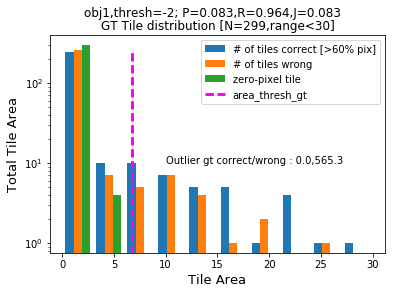

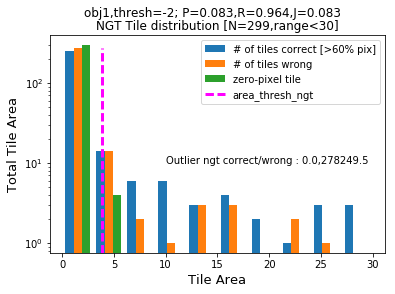

In [73]:
plot_tile_distribution("5workers_rand0",1,-2)

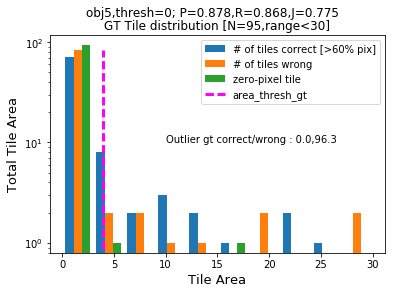

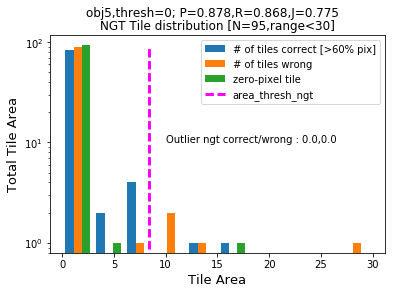

In [74]:
plot_tile_distribution("5workers_rand0",5,0)

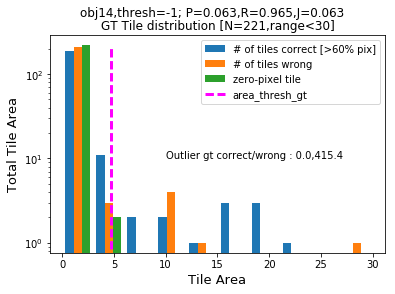

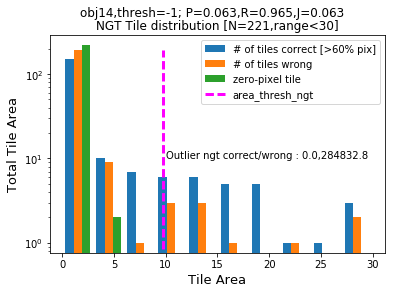

In [75]:
plot_tile_distribution("5workers_rand0",14,-1)

In [166]:
df[(df["num_workers"]==5)&(df["objid"]==14)][keys]

,num_workers,objid,thresh,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
46,5,14,-2,0.923371,0.895512,0.923371,0.062915,0.888728,0.861371
47,5,14,-1,0.923371,0.895512,0.923371,0.062915,0.909386,0.905783
48,5,14,0,0.923371,0.921332,0.923371,0.883412,0.925457,0.925662
49,5,14,1,0.923371,0.923371,0.923371,0.876861,0.929089,0.922443
50,5,14,2,0.923371,0.923371,0.923371,0.876861,0.894309,0.899440


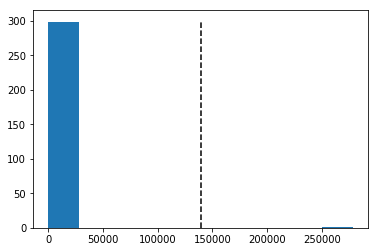

In [87]:
plt.hist(tile_area)
tile
plt.vlines((min(tile_area)+max(tile_area))/2.,0,300,linestyles='--')

In [82]:
(min(tile_area)+max(tile_area))/2.

139124.77017471433

In [83]:
max(tile_area)

278249.5397421412